# Stock Market Analysis

In [17]:
used this for my analysis:
    https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
        

SyntaxError: invalid syntax (4018239153.py, line 1)

In [1]:
# My aim is to read in a number of different stocks from Yahoo Finance
# Based on psat performance, I hope to predict which may perform best
# I will then compare my predictions with what has happened to evaulate my predictions 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

# Import data from Yahoo Finance

In [2]:
"""
Unfortunately, because I conducted this work on a work laptop, I am unable to download the data in this way
Instead I will have to manually download the data and process it this way

# For now I will just select a number of large tech stocks
# I have chosen these 10 based on an article written by Forbes, who state them as being the 10 best tech stocs for 2024
# Lets see how they perform!
# https://www.forbes.com/sites/investor-hub/article/best-tech-stocks-for-2024/?sh=1edc7adb74aa
ticker_names = ['EA','META','TCEHY','AMZN','AAPL','NVDA','CPRT','GILD','LRCX','SNOW']
company_names = ['Electronic Arts','Meta Platforms','Tencent Holdinds','Amazon',
                 'Apple','Nvidia','Copart','Gileaad Sciences','LAM Research','Snowflake']


# Download the data for a period of time 
end = datetime.now()
start = datetime(end.year-3, end.month, end.day)
for stock in ticker_names:
    yf.download(stock, start, end)
    
"""

"\nUnfortunately, because I conducted this work on a work laptop, I am unable to download the data in this way\nInstead I will have to manually download the data and process it this way\n\n# For now I will just select a number of large tech stocks\n# I have chosen these 10 based on an article written by Forbes, who state them as being the 10 best tech stocs for 2024\n# Lets see how they perform!\n# https://www.forbes.com/sites/investor-hub/article/best-tech-stocks-for-2024/?sh=1edc7adb74aa\nticker_names = ['EA','META','TCEHY','AMZN','AAPL','NVDA','CPRT','GILD','LRCX','SNOW']\ncompany_names = ['Electronic Arts','Meta Platforms','Tencent Holdinds','Amazon',\n                 'Apple','Nvidia','Copart','Gileaad Sciences','LAM Research','Snowflake']\n\n\n# Download the data for a period of time \nend = datetime.now()\nstart = datetime(end.year-3, end.month, end.day)\nfor stock in ticker_names:\n    yf.download(stock, start, end)\n    \n"

In [2]:
import os
os.getcwd()

'C:\\Users\\mball3\\OneDrive - KPMG\\Documents\\Investment_Analysis'

In [3]:
import glob
glob.glob('raw_data/*.csv')

['raw_data\\aapl.csv',
 'raw_data\\amzn.csv',
 'raw_data\\cprt.csv',
 'raw_data\\ea.csv',
 'raw_data\\gild.csv',
 'raw_data\\lrcx.csv',
 'raw_data\\meta.csv',
 'raw_data\\nvda.csv',
 'raw_data\\snow.csv',
 'raw_data\\tcehy.csv']

#  Read in raw data and  inspecting it

In [1]:
# Read in the raw data
import glob

path = r'C:\\Users\\mball3\\OneDrive - KPMG\\Documents\\Investment_Analysis\\raw_data'
filenames = glob.glob(path+"/*.csv")

dfs = []
for filename in filenames:
    temp = pd.read_csv(filename)
    temp['stock'] = filename.split("\\")[-1].split('.')[0]
    dfs.append(temp)
    
raw_data = pd.concat(dfs, ignore_index=True)

# Make a copy
stock_data = raw_data

# Convert date to date format - english 
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# change header names
stock_data.columns = ("Date","Close ($)","Volume","Open ($)","High ($)","Low ($)","Stock")

# Re order columns
stock_data = stock_data[["Date","Stock","Open ($)","Close ($)","Volume","High ($)","Low ($)"]]

# Remove $ signs
stock_data.replace('[\$,]', '', regex=True, inplace=True)

# Set the date as the index
stock_data = stock_data.set_index('Date')

# make certain columns numeric 
cols_to_convert = ["Close ($)","Volume","Open ($)","High ($)","Low ($)"]
stock_data[cols_to_convert] = stock_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

NameError: name 'pd' is not defined

In [6]:
# Noticeable that there are not dates for every date - tradig doesnt occur on weekends so this makes sense
stock_data.head()

,Stock,Open ($),Close ($),Volume,High ($),Low ($)
Date,,,,,,
2023-12-14,aapl,198.02,198.11,66831570,199.62,196.16
2023-12-13,aapl,195.09,197.96,70404180,198.00,194.85
2023-12-12,aapl,193.08,194.71,52696900,194.72,191.72
2023-12-11,aapl,193.11,193.18,60943700,193.49,191.42
2023-12-08,aapl,194.20,195.71,53406360,195.99,193.67


In [7]:
# Inspect AAPL data 
stock_data[stock_data['Stock']=='aapl'].describe()

,Open ($),Close ($),Volume,High ($),Low ($)
count,251.000000,251.000000,2.510000e+02,251.000000,251.000000
mean,169.609920,169.889482,6.073480e+07,171.236414,168.292749
std,18.634347,18.591297,1.847428e+07,18.456185,18.742864
min,126.010000,125.020000,2.404834e+07,127.770000,124.170000
25%,155.575000,156.625000,4.862099e+07,157.600000,154.215000
50%,173.800000,174.000000,5.605826e+07,175.240000,172.640000
75%,183.850000,183.955000,6.743982e+07,185.720000,182.230000
max,198.020000,198.110000,1.601569e+08,199.620000,196.160000


In [8]:
"""
Description of each variable:
Open - opening price that day
Close - close price that day
Volume - number of trades made that day
High - highest value that day
Low - lowest price that day


What is notable from above?
- the close price on average is marginally higher than the open price
- the close price also has a slightly smaller standard deviation, 
  meaning there is less veriance in the price of this stock at close
  
- the median < mean for volume, meaning there is a positive skew for the volume of trades
    - this means that the volume of transactions of AAPL are more often less than the mean 
    
- the skew of the high price is lower than of the low price, meaning the price fluctuation 
  around a spike is slightly lower than of a dip

"""

'\nDescription of each variable:\nOpen - opening price that day\nClose - close price that day\nVolume - number of trades made that day\nHigh - highest value that day\nLow - lowest price that day\n\n\nWhat is notable from above?\n- the close price on average is marginally higher than the open price\n- the close price also has a slightly smaller standard deviation, \n  meaning there is less veriance in the price of this stock at close\n  \n- the median < mean for volume, meaning there is a positive skew for the volume of trades\n    - this means that the volume of transactions of AAPL are more often less than the mean \n    \n- the skew of the high price is lower than of the low price, meaning the price fluctuation \n  around a spike is slightly lower than of a dip\n\n'

In [9]:
# Have a look at the info
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2510 entries, 2023-12-14 to 2022-12-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stock      2510 non-null   object 
 1   Open ($)   2510 non-null   float64
 2   Close ($)  2510 non-null   float64
 3   Volume     2510 non-null   int64  
 4   High ($)   2510 non-null   float64
 5   Low ($)    2510 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 137.3+ KB


In [10]:
"""
Given I have already adjusted these, this makes sense
"""

'\nGiven I have already adjusted these, this makes sense\n'

# Exploratory Analysis

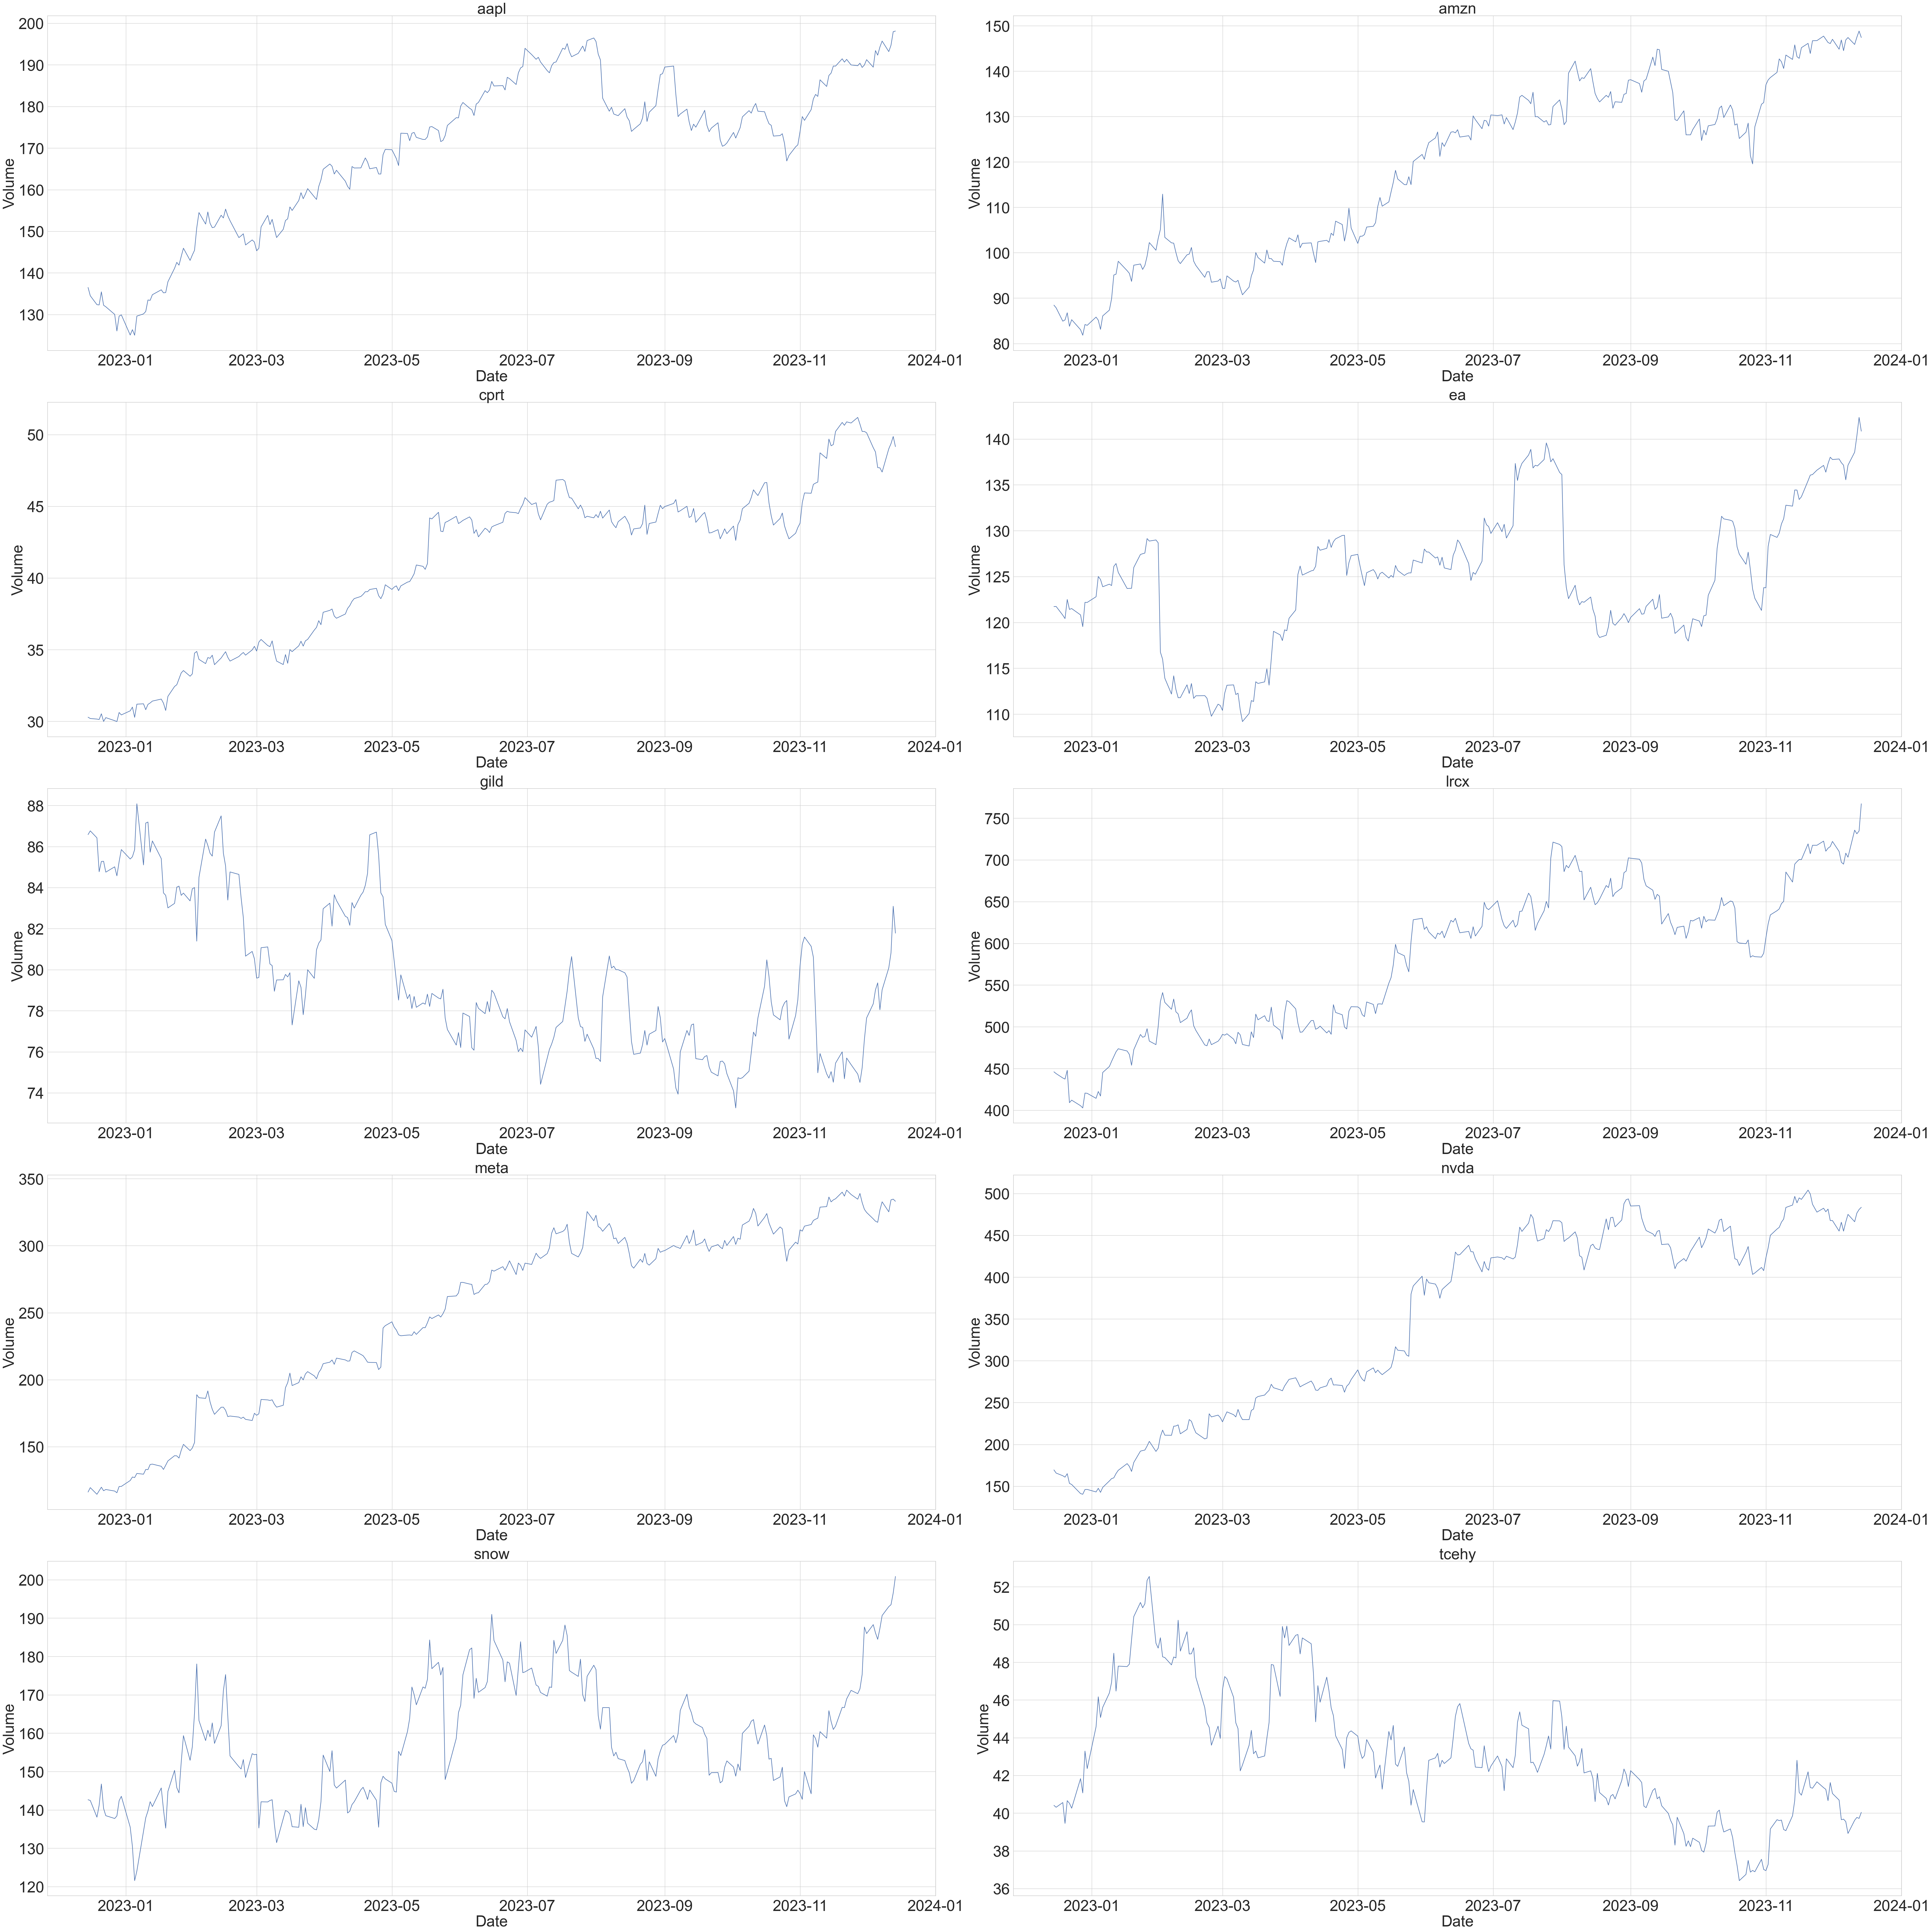

In [16]:
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(70, 70))

# Vis for each stock
stocks = stock_data['Stock'].unique()

for i, stock in enumerate(stocks, 1):
    subset = stock_data[stock_data['Stock'] == stock]
    plt.subplot(5,2, i)
    sns.lineplot(x=subset.index, y=subset['Close ($)'], data=subset)
    plt.title(f'{stock}', fontsize=40)
    plt.xlabel('Date', fontsize=40)
    plt.xticks(fontsize=40)
    plt.ylabel('Volume', fontsize=40)
    plt.yticks(fontsize=40)
    
plt.subplots_adjust(hspace=100)

plt.tight_layout()
plt.show()